In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, f1_score, auc
import seaborn as sns

In [ ]:
# Import the dataset

In [ ]:
raw_dementia_data = pd.read_csv('/content/Dementia data.csv')

DATA EXPLORATION

In [ ]:
#Explore the dataset to gather more information about it's composition

In [ ]:
#Display the fist five rows
raw_dementia_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
#Description of data in the dataset based on each relevant column
raw_dementia_data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
#Further descriptives to know more details about the dataset
raw_dementia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   Gender      373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


DATA PRE PROCESSING

In [ ]:
#The unique categories of Gender
raw_dementia_data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
# Convert categorical variables (Male and Female) to binary (Male = 1 and Female = 0) 
raw_dementia_data['Gender'] = [1 if each == "M" else 0 for each in raw_dementia_data['Gender']]

In [ ]:
#The unique categories of Group
raw_dementia_data['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [ ]:
# Merge 'Converted and Demented'as 'Demented' and convert categorical variables (Demented and Non-Demented) to binary (Demented = 1 and Non-Demented = 0) 
raw_dementia_data['Group'] = [1 if each == "Demented" or each == "Converted" else 0 for each in raw_dementia_data['Group']]
raw_dementia_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
# Check again the description of data in the dataset based on each relevant column including Group and Gender
raw_dementia_data.describe()

,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,0.490617,1.882038,595.104558,0.428954,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.500583,0.922843,635.485118,0.495592,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,0.000000,2.000000,552.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,1.000000,2.000000,873.000000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,1.000000,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
# Subset the needed features
boot_dementia_data = raw_dementia_data[['Group','Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV', 'nWBV', 'ASF']]
boot_dementia_data.head()

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
#Descriptives to know more details about the required features
boot_dementia_data.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 10 entries, Group to ASF
dtypes: float64(5), int64(5)
memory usage: 29.3 KB


In [ ]:
# Selection of Dataset Features
y = boot_dementia_data['Group'].values
X = boot_dementia_data[['Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV', 'nWBV', 'ASF']]

In [ ]:
# Bootstrap the dataset

# Set random seed 
np.random.seed(1234)

# Initialize Iteration loop
n_iterations = 1000
for i in range(n_iterations): # Set range for iteration
    X_bs, y_bs = resample(X, y, replace=True)   # Resample to create new datasets

In [ ]:
# Display the first five rows of the independent variables of the bootstrap sample created
X_bs.head()

,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
205,1,66,12,4.0,30.0,0.5,1446,0.780,1.214
327,1,82,14,2.0,23.0,0.5,1514,0.678,1.159
135,0,81,12,NaN,27.0,0.5,1453,0.721,1.208
3,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
304,0,82,13,2.0,30.0,0.0,1342,0.747,1.307


In [ ]:
# Display the distribution of the target variable (Group) of the bootstrap sample created where 1 = Demented and 0 = Non-Demented
print(y_bs)

[1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0
 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1
 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 1]


In [ ]:
# Merge the bootstrap dataset together
X_bs['Group'] = y_bs.tolist()
X_bs.head()

,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
205,1,66,12,4.0,30.0,0.5,1446,0.780,1.214,1
327,1,82,14,2.0,23.0,0.5,1514,0.678,1.159,1
135,0,81,12,NaN,27.0,0.5,1453,0.721,1.208,1
3,1,76,12,NaN,28.0,0.5,1738,0.713,1.010,1
304,0,82,13,2.0,30.0,0.0,1342,0.747,1.307,0


In [ ]:
# Check to see the description of data in the merged bootsrap dataset 
X_bs.describe()

,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
count,373.000000,373.000000,373.000000,355.000000,371.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.410188,76.941019,14.646113,2.422535,27.646900,0.276139,1475.533512,0.733421,1.204611,0.463807
std,0.492528,7.393455,2.786916,1.087447,3.316928,0.384713,167.550898,0.035164,0.135627,0.499358
min,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.644000,0.883000,0.000000
25%,0.000000,72.000000,12.000000,2.000000,27.000000,0.000000,1348.000000,0.709000,1.107000,0.000000
50%,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1463.000000,0.734000,1.199000,0.000000
75%,1.000000,82.000000,17.000000,3.000000,30.000000,0.500000,1586.000000,0.757000,1.302000,1.000000
max,1.000000,98.000000,20.000000,5.000000,30.000000,2.000000,1987.000000,0.837000,1.587000,1.000000


DATA VISUALIZATION

In [ ]:
# Data Visualization

Text(0.5, 1.0, 'Distribution of Classes of Dementia')

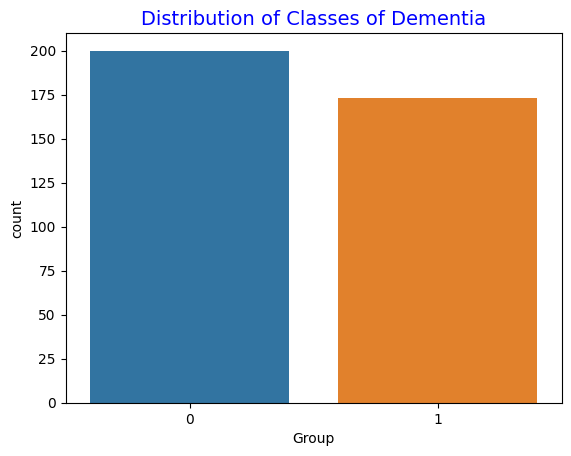

In [ ]:
# Bar graph to depict the distribution of the class 'Group' (Demented = 1 and Non-Demented = 0)
sns.countplot(x="Group", data=X_bs)
plt.title('Distribution of Classes of Dementia', size=14, color = 'blue')

Text(0.5, 1.0, 'Distribution of Classes of Dementia by Gender')

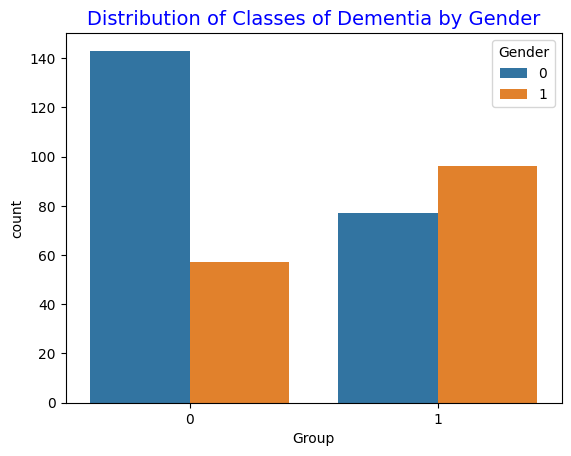

In [ ]:
# Bar graph to depict the distribution of the class 'Group' (Demented = 1 and Non-Demented = 0) by Gender
sns.countplot(x="Group", hue='Gender', data=X_bs)
plt.title('Distribution of Classes of Dementia by Gender', size=14, color = 'blue')

<Figure size 2500x2000 with 0 Axes>

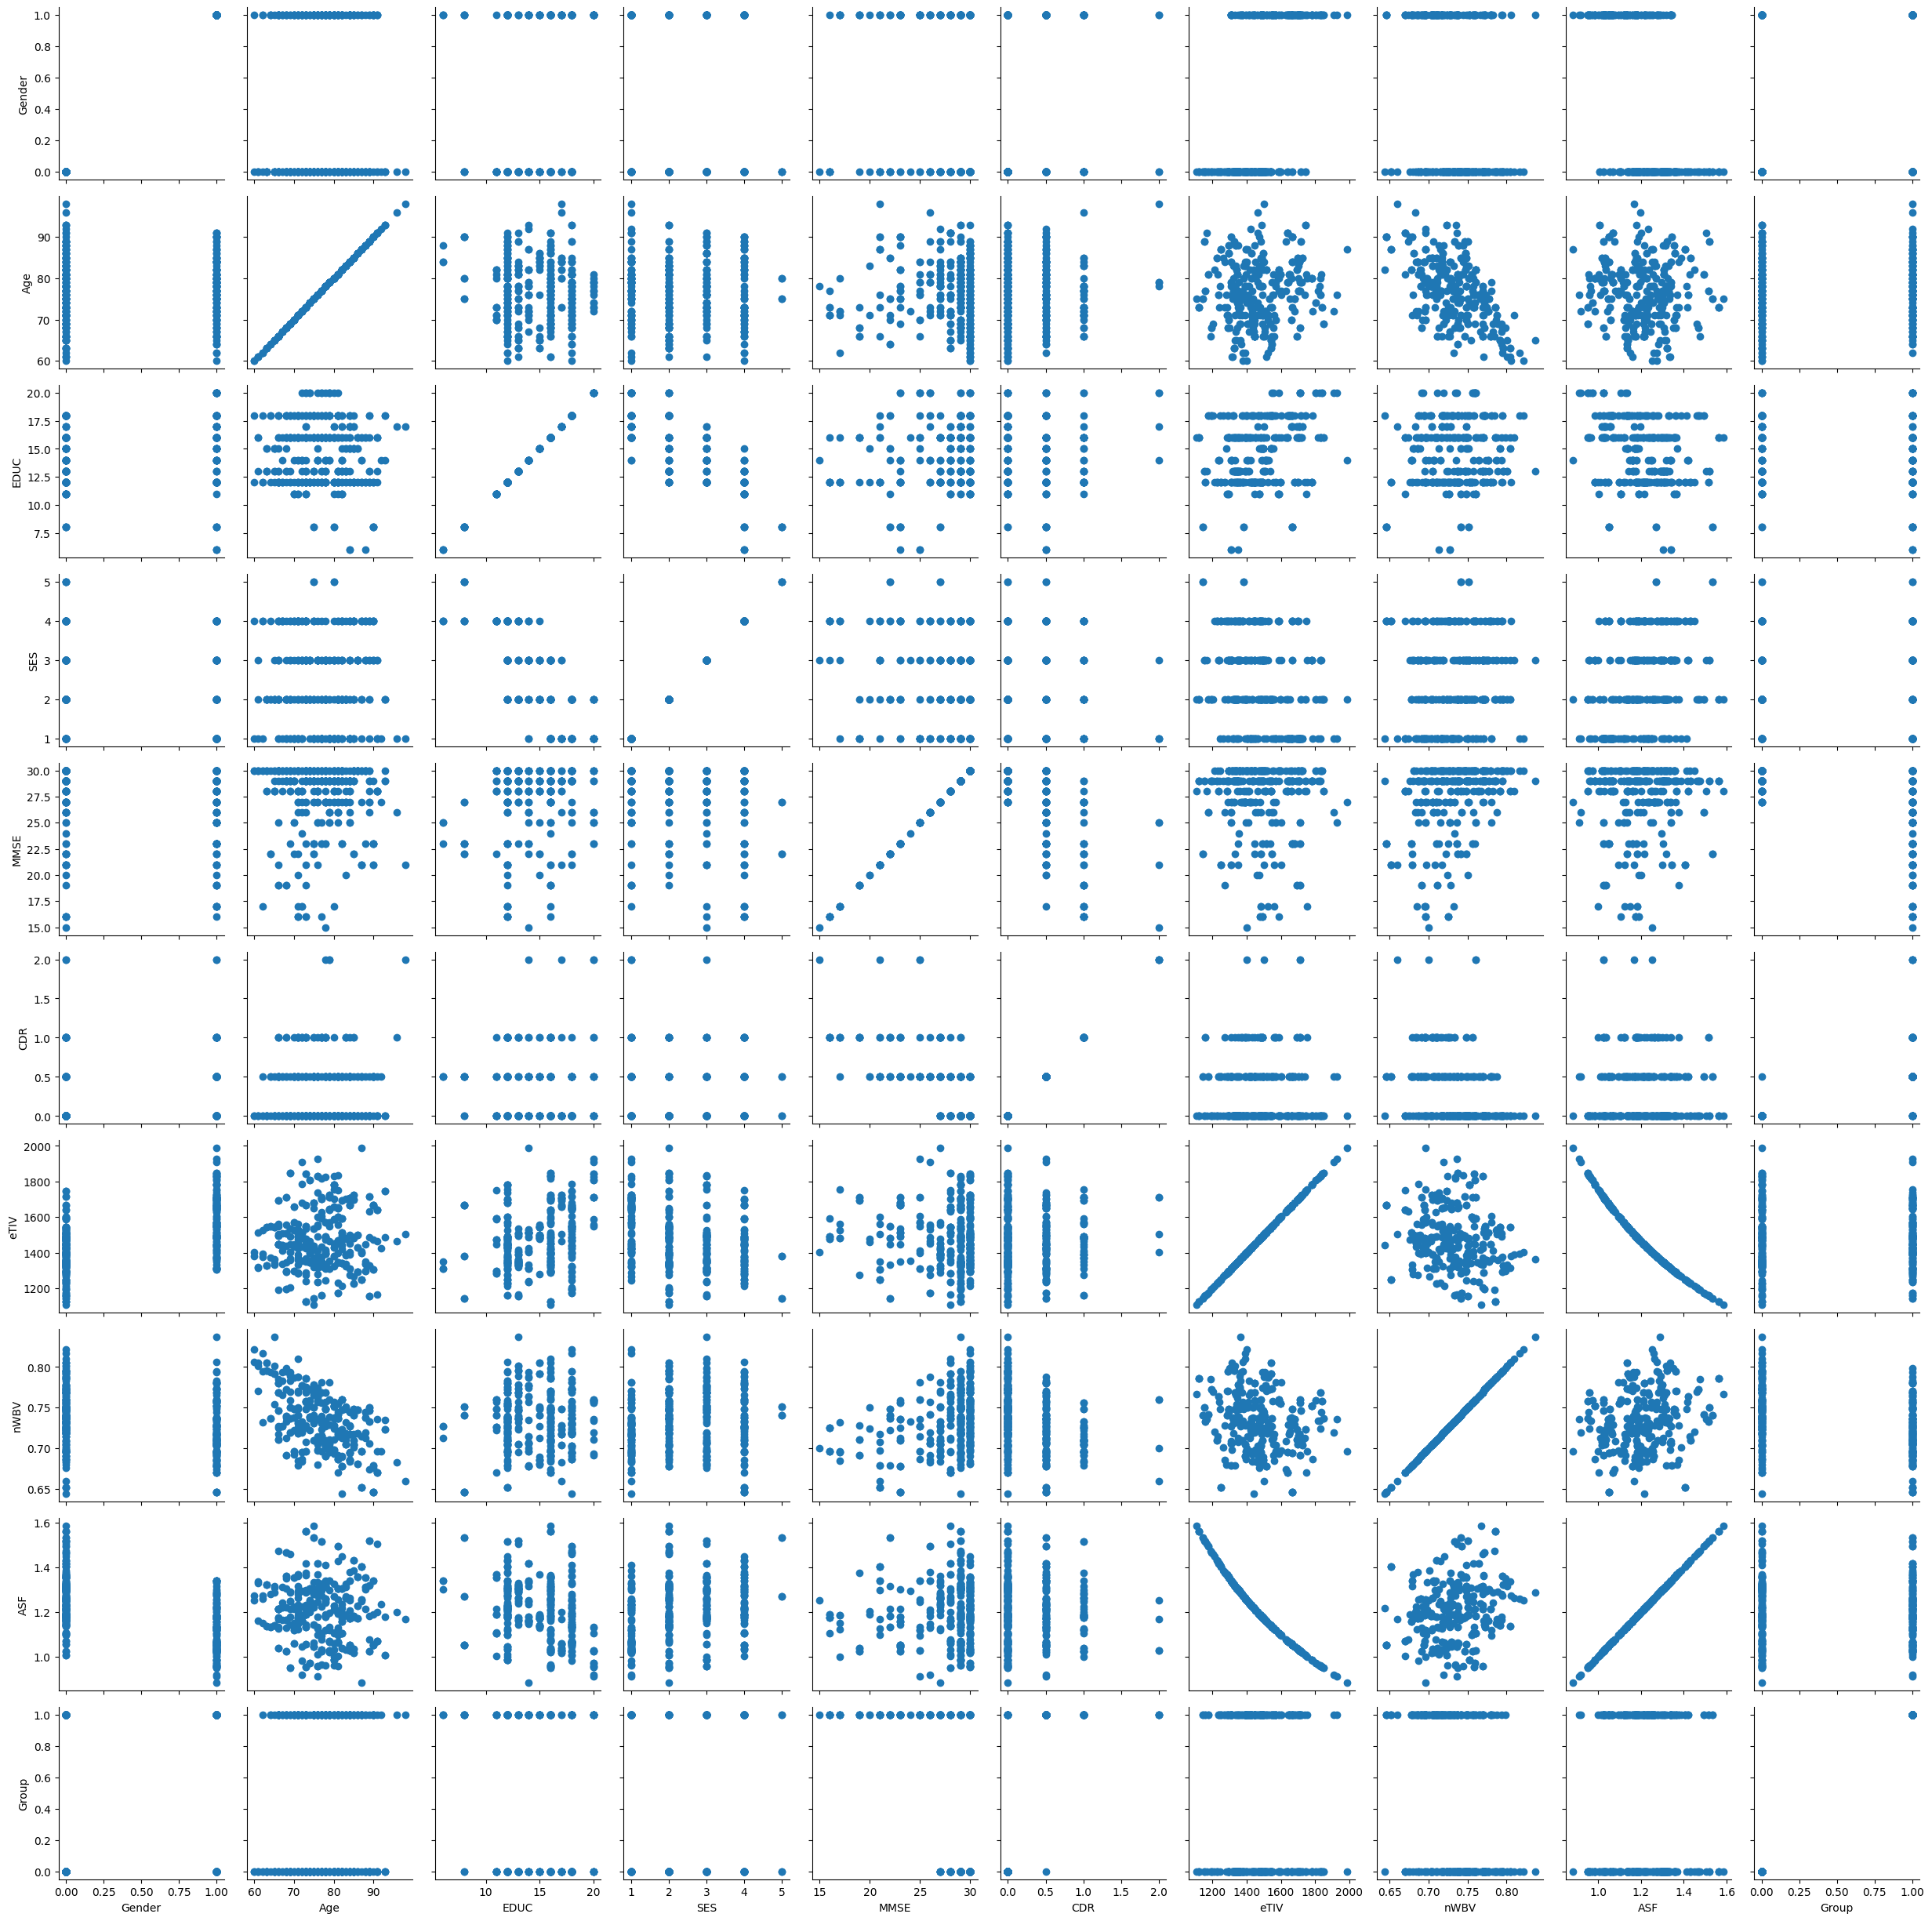

In [ ]:
# Scatter plot to observe the distribution and relationships of the variables in a grid form
g = sns.PairGrid(X_bs)
plt.figure(figsize=(25,20))
g = g.map(plt.scatter)

INFERENTIAL ANALYSIS

In [ ]:
# Correlation Analysis

In [ ]:
# Determine what variable is most correlated with the target variable (Group)
X_bs.corr()["Group"].sort_values()

MMSE     -0.533187
nWBV     -0.370908
EDUC     -0.171484
eTIV     -0.019126
ASF       0.001360
Age       0.047476
SES       0.065415
Gender    0.273656
CDR       0.765801
Group     1.000000
Name: Group, dtype: float64

In [ ]:
# Correlation amongst all variables (Display in 2 decimal places)
X_bs.corr().round(2)

,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
Gender,1.00,0.04,0.15,-0.14,-0.17,0.22,0.59,-0.30,-0.57,0.27
Age,0.04,1.00,-0.08,-0.01,0.00,0.02,0.08,-0.56,-0.06,0.05
EDUC,0.15,-0.08,1.00,-0.73,0.19,-0.12,0.30,0.05,-0.28,-0.17
SES,-0.14,-0.01,-0.73,1.00,-0.18,0.06,-0.32,0.07,0.31,0.07
MMSE,-0.17,0.00,0.19,-0.18,1.00,-0.70,-0.05,0.35,0.05,-0.53
CDR,0.22,0.02,-0.12,0.06,-0.70,1.00,0.02,-0.34,-0.04,0.77
eTIV,0.59,0.08,0.30,-0.32,-0.05,0.02,1.00,-0.21,-0.99,-0.02
nWBV,-0.30,-0.56,0.05,0.07,0.35,-0.34,-0.21,1.00,0.21,-0.37
ASF,-0.57,-0.06,-0.28,0.31,0.05,-0.04,-0.99,0.21,1.00,0.00
Group,0.27,0.05,-0.17,0.07,-0.53,0.77,-0.02,-0.37,0.00,1.00


<Axes: >

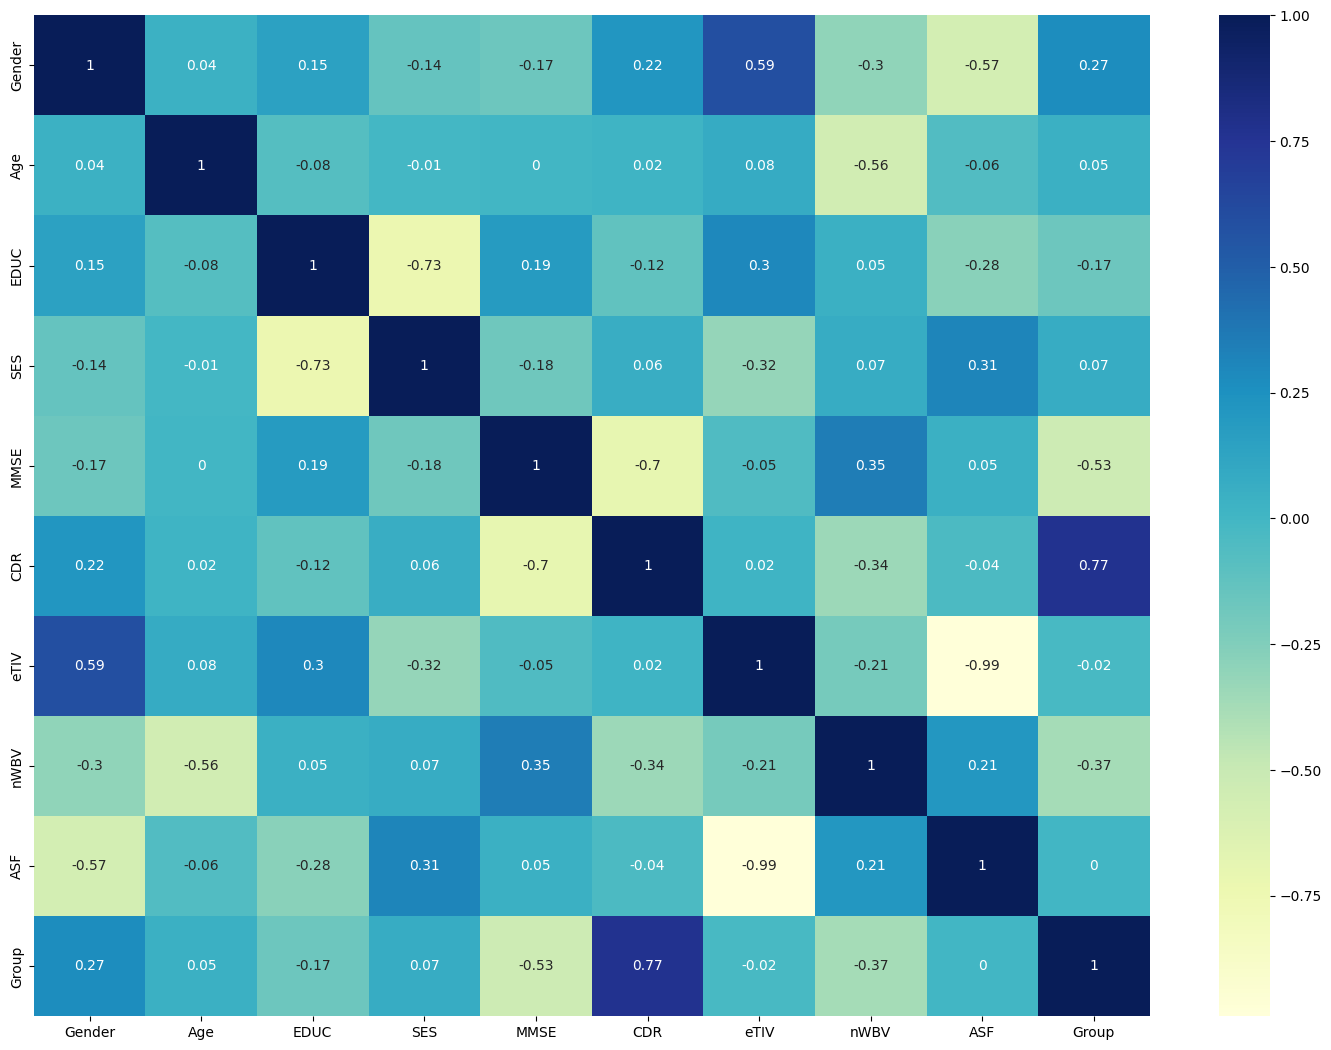

In [ ]:
#Heatmap to visualize the correlation amongst the variables, at a glance
corr_dementia_data = X_bs.corr().round(2)
plt.figure(figsize=(18,13))
sns.heatmap(corr_dementia_data, annot=True, cmap="YlGnBu")

MACHINE LEARNING

In [ ]:
# Modeling the dataset with Boostrapping

In [ ]:
# Train-Test Split

In [ ]:
# Selection of Dataset Features
y = X_bs['Group'].values # Target Variable
X = X_bs[['Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV', 'nWBV', 'ASF']] #Independent Variables

In [ ]:
# Replace Missing Values to Take Care of Possible NaN
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
imputer = imputer.fit(X)
 
# Imputing the data    
X = imputer.transform(X)

In [ ]:
# Standardize the data set by rescaling
sc = StandardScaler().fit(X)
X_std = sc.transform(X)

In [ ]:
# Train-Test Distribution Without Boostrapping

# Split and train the dataset - training set is 80%; test set is 20%
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size= 0.20, random_state=4)

df_ytrain = pd.DataFrame(y_train) #Train Split
df_ytest = pd.DataFrame(y_test) #Test Split

# The Training Split target feature where 1 = Demented and 0 = Non-Demented
print('In Training Split:')
print(df_ytrain[0].value_counts())

# The Testing Split target feature where 1 = Demented and 0 = Non-Demented
print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In Training Split:
0    161
1    137
Name: 0, dtype: int64

In Testing Split:
0    39
1    36
Name: 0, dtype: int64


Modeling Techniques

In [ ]:
# LOGISTIC REGRESSION

In [ ]:
#Hyperparameter Tuning for Logistic Regression Model

param_grid = {'penalty': ['l1','l2'], 
               'C': [0.001,0.01,0.1,1, 2, 3, 5, 10,100,1000]}

#GridSearch with CV function used to perform the grid search 
optimal_params = GridSearchCV(LogisticRegression(), #LR as the estimator
                             param_grid,
                             cv=10, # 10-fold as in k-fold cross validation
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

#Fit the grid search on to the training data
optimal_params.fit(X_train, y_train) 

#Display hyperparameters that achieve best CV score on the training data
print(optimal_params.best_params_)
print("")
print("")
print("")

{'C': 0.1, 'penalty': 'l2'}





/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

In [ ]:
# The value of the C hyperparameter that resulted in the best performance during the tuning process
best_C = optimal_params.best_params_['C']

# The value of the penalty hyperparameter that resulted in the best performance during the tuning process
best_penalty = optimal_params.best_params_['penalty']

In [ ]:
#Instantiate LR Model with best hyperparameters and train on the training data
clf_lr = LogisticRegression(C=best_C, penalty=best_penalty).fit(X_train, y_train)

In [ ]:
# Use the LR model to make predictions on the training data 
y_pred1 = clf_lr.predict(X_train)

# Use the LR model to make predictions on the test data 
y_pred = clf_lr.predict(X_test)

In [ ]:
# Logistic Regression Model Evaluation - Train dataset

f1score = f1_score(y_train, y_pred1)
accuracy = accuracy_score(y_train, y_pred1)
tn, fp, fn, tp = confusion_matrix(y_train, y_pred1).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_train, y_pred1)
train_auc = auc(fpr, tpr)


print('Train Accuracy:', accuracy)
print('Train Precision:', precision)
print('Train Recall:', recall)
print('Train F1-score:', f1score)
print('Train AUC:', train_auc)

Train Accuracy: 0.9530201342281879
Train Precision: 1.0
Train Recall: 0.43309859154929575
Train F1-score: 0.9461538461538462
Train AUC: 0.948905109489051


In [ ]:
# Logistic Regression Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
train_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', train_auc)

Test Accuracy: 0.9066666666666666
Test Precision: 0.967741935483871
Test Recall: 0.4411764705882353
Test F1-score: 0.8955223880597015
Test AUC: 0.9038461538461539


In [ ]:
# DECISION TREE

In [ ]:
#Hyperparameter Tuning for Decision Tree Model

param_grid = {'criterion': ['gini'], # measure the quality of a split
              'max_depth': range(1,10)} # Maximum number of levels in tree

#GridSearch with CV function used to perform the grid search
optimal_params = GridSearchCV(tree.DecisionTreeClassifier(), #DT Classifier as the estimator
                             param_grid,
                             cv=10, # 10-fold as in k-fold cross validation
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

#Fit the grid search on to the training data
optimal_params.fit(X_train, y_train)

#Display hyperparameters that achieve best CV score on the training data
print(optimal_params.best_params_)

{'criterion': 'gini', 'max_depth': 8}


In [ ]:
# The value of the criterion hyperparameter that resulted in the optimal performance during the tuning process
criterion = optimal_params.best_params_['criterion']

# The value of the max-depth hyperparameter that resulted in the optimal performance during the tuning process
max_depth = optimal_params.best_params_['max_depth']

In [ ]:
#Instantiate DT Classifier Model with optimal hyperparameters and train on the training data
dt = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth).fit(X_train, y_train)

In [ ]:
# Use the DT model to make predictions on the training data 
y_pred1 = dt.predict(X_train)

# Use the DT model to make predictions on the test data 
y_pred = dt.predict(X_test)

In [ ]:
# Decision Tree Model Evaluation - Train dataset

f1score = f1_score(y_train, y_pred1)
accuracy = accuracy_score(y_train, y_pred1)
tn, fp, fn, tp = confusion_matrix(y_train, y_pred1).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_train, y_pred1)
train_auc = auc(fpr, tpr)


print('Train Accuracy:', accuracy)
print('Train Precision:', precision)
print('Train Recall:', recall)
print('Train F1-score:', f1score)
print('Train AUC:', train_auc)

Train Accuracy: 0.9899328859060402
Train Precision: 1.0
Train Recall: 0.4542372881355932
Train F1-score: 0.988929889298893
Train AUC: 0.9890510948905109


In [ ]:
# Decision Tree Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
train_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', train_auc)

Test Accuracy: 0.9466666666666667
Test Precision: 0.9705882352941176
Test Recall: 0.4647887323943662
Test F1-score: 0.9428571428571428
Test AUC: 0.9455128205128204


In [ ]:
# RANDOM FOREST

In [ ]:
# Number of trees in decision tree
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = range(1,10)

# measure the quality of a split
criterion = ['gini']

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
#Hyperparameter Tuning for Random Forest Model

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'bootstrap': bootstrap}

In [ ]:
#GridSearch with CV function used to perform the grid search
optimal_params = GridSearchCV(RandomForestClassifier(), #RF Classifier as the estimator
                             param_grid,
                             cv=10, #10-fold cross validation
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

#Fit the grid search on to the training data
optimal_params.fit(X_train, y_train)

#Display hyperparameters that achieve best CV score on the training data
print(optimal_params.best_params_)
print("")
print("")
print("")

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}





/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# The value of the various hyperparameters that resulted in the optimal performance during the tuning process
bootstrap = optimal_params.best_params_['bootstrap']
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']
max_features = optimal_params.best_params_['max_features']
n_estimators = optimal_params.best_params_['n_estimators']

#Instantiate RF Classifier Model with the optimal hyperparameters
rfc = RandomForestClassifier(n_estimators=n_estimators, 
                             max_features=max_features, 
                             max_depth=max_depth, 
                             criterion=criterion,
                             bootstrap=bootstrap,
                             random_state=4)

# Train the instantiated model together with hyperparameters on the training data
rfc.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', random_state=4)

In [ ]:
# Use the RF model to make predictions on the training data 
y_pred1 = rfc.predict(X_train)

# Use the RF model to make predictions on the test data 
y_pred = rfc.predict(X_test)

In [ ]:
# Random Forest Model Evaluation - Train dataset

f1score = f1_score(y_train, y_pred1)
accuracy = accuracy_score(y_train, y_pred1)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_train, y_pred1)
train_auc = auc(fpr, tpr)


print('Train Accuracy:', accuracy)
print('Train Precision:', precision)
print('Train Recall:', recall)
print('Train F1-score:', f1score)
print('Train AUC:', train_auc)

Train Accuracy: 1.0
Train Precision: 0.9705882352941176
Train Recall: 0.4647887323943662
Train F1-score: 1.0
Train AUC: 1.0


In [ ]:
# Random Forest Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
train_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', train_auc)

Test Accuracy: 0.9333333333333333
Test Precision: 0.9705882352941176
Test Recall: 0.4647887323943662
Test F1-score: 0.927536231884058
Test AUC: 0.9316239316239316


In [ ]:
# SUPPORT VECTOR MACHINE (SVM)

In [ ]:
#Hyperparameter Tuning for Support Vector Model

param_grid = [
    {'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100],
    'gamma': ['scale', 0.5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
]
#GridSearch with CV function used to perform the grid search
optimal_params = GridSearchCV(SVC(), #SV Classifier as estimator
                             param_grid,
                             cv=10, # 10fold as in k-fold cross validation
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

#Fit the grid search on to the training data
optimal_params.fit(X_train, y_train)

#Display hyperparameters that achieve best CV score on the training data
print(optimal_params.best_params_)

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# The value of the C hyperparameter that resulted in the optimal performance during the tuning process
C = optimal_params.best_params_['C']

# The value of the gamma hyperparameter that resulted in the optimal performance during the tuning process
gamma = optimal_params.best_params_['gamma']

# The value of the kernel hyperparameter that resulted in the optimal performance during the tuning process
kernel = optimal_params.best_params_['kernel']

In [ ]:
#Instantiate SV Classifier Model with the optimal hyperparameters
clf_svm = SVC(random_state=4, C=C, gamma=gamma, kernel=kernel)

# Train the instantiated model together with hyperparameters on the training data
clf_svm.fit(X_train, y_train)

SVC(C=0.5, random_state=4)

In [ ]:
# Use the SV model to make predictions on the training data 
y_pred1 = clf_svm.predict(X_train)

# Use the SV model to make predictions on the test data 
y_pred = clf_svm.predict(X_test)

In [ ]:
# SVM Model Evaluation - Train dataset

f1score = f1_score(y_train, y_pred1)
accuracy = accuracy_score(y_train, y_pred1)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
train_auc = auc(fpr, tpr)


print('Train Accuracy:', accuracy)
print('Train Precision:', precision)
print('Train Recall:', recall)
print('Train F1-score:', f1score)
print('Train AUC:', train_auc)

Train Accuracy: 0.9530201342281879
Train Precision: 0.9705882352941176
Train Recall: 0.4647887323943662
Train F1-score: 0.9461538461538462
Train AUC: 0.9316239316239316


In [ ]:
# SVM Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
train_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', train_auc)


Test Accuracy: 0.9066666666666666
Test Precision: 0.9705882352941176
Test Recall: 0.4647887323943662
Test F1-score: 0.8955223880597015
Test AUC: 0.9316239316239316


In [ ]:
# K-NEAREST NEIGHBOUR

In [ ]:
#Hyperparameter Tuning for K-Nearest Neighbour Model

params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,30]}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), #KN Classifier as estimator
                              params)

#Fit the grid search on to the training data
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                         30]})

In [ ]:
#Display hyperparameters that achieve best CV score on the training data
print(grid_search_cv.best_params_)

{'n_neighbors': 1}


In [ ]:
# Return the estimator that has the highest average score across all cross-validation folds - 
# optimal number of neighbors found during the hyperparameter tuning process.
optimised_KNN = grid_search_cv.best_estimator_

In [ ]:
# Use the KNN model to make predictions the training data 
y_pred1 = optimised_KNN.predict(X_train)

# Use the KNN model to make predictions the test data 
y_pred = optimised_KNN.predict(X_test)

In [ ]:
# KNN Model Evaluation - Train dataset

f1score = f1_score(y_train, y_pred1)
accuracy = accuracy_score(y_train, y_pred1)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
train_auc = auc(fpr, tpr)


print('Train Accuracy:', accuracy)
print('Train Precision:', precision)
print('Train Recall:', recall)
print('Train F1-score:', f1score)
print('Train AUC:', train_auc)

Train Accuracy: 1.0
Train Precision: 0.9705882352941176
Train Recall: 0.4647887323943662
Train F1-score: 1.0
Train AUC: 0.9316239316239316


In [ ]:
# KNN Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
train_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', train_auc)

Test Accuracy: 0.96
Test Precision: 0.9705882352941176
Test Recall: 0.4647887323943662
Test F1-score: 0.9565217391304348
Test AUC: 0.9316239316239316


In [ ]:
# EXTREME GRADIENT BOOSTED TREE

In [ ]:
# Initialize the XGB Classifier Class
estimator = xgb.XGBClassifier( 

# Predict one of two possible classes    
objective= 'binary:logistic',

# Number of threads for parallel processing
nthread=4, 

# Random seed for reprodicibility
seed=4 
)

In [ ]:
#Hyperparameter Tuning for Extreme Gradient Boost Model

parameters = {
     # Maximum depth of each tree
    'max_depth':range(2,10,1), 

    # Number of trees to be used in the model
    'n_estimators':range(60,220,40),

    # Determines the contributing rate of each tree in the model
    'learning_rate':[0.1,0.01,0.05]
}

In [ ]:
#GridSearch with CV function used to perform the grid search
grid_search=GridSearchCV(
estimator=estimator, #XGB Classifier as estimator
param_grid=parameters,
scoring='accuracy',
n_jobs=-1,
cv=10)

In [ ]:
#Fit the grid search on to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='accuracy')

In [ ]:
# Return the estimator that has the optimal combination of hyperparameter found during tuning process.
optimised_xgb = grid_search.best_estimator_

In [ ]:
# Use the XGB model to make predictions the training data 
y_pred1 = optimised_xgb.predict(X_train)

# Use the XGB model to make predictions the test data 
y_pred = optimised_xgb.predict(X_test)

In [ ]:
# XGB Model Evaluation - Train dataset

f1score = f1_score(y_train, y_pred1)
accuracy = accuracy_score(y_train, y_pred1)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
train_auc = auc(fpr, tpr)


print('Train Accuracy:', accuracy)
print('Train Precision:', precision)
print('Train Recall:', recall)
print('Train F1-score:', f1score)
print('Train AUC:', train_auc)

Train Accuracy: 0.9966442953020134
Train Precision: 0.9705882352941176
Train Recall: 0.4647887323943662
Train F1-score: 0.9963369963369962
Train AUC: 0.9316239316239316


In [ ]:
# XGB Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
train_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', train_auc)

Test Accuracy: 0.9333333333333333
Test Precision: 0.9705882352941176
Test Recall: 0.4647887323943662
Test F1-score: 0.9315068493150684
Test AUC: 0.9316239316239316


In [ ]:
# NAIVE BAYESIAN

In [ ]:
#Hyperparameter Tuning for Logistic Regression Model

params = {
    # Determine regularization strength
    'alpha': [0.01,0.1,0.5,1.0,10.0],

    # Learn the prior probabilities of the classes
    'fit_prior': [True, False],

    # Specify the prior probabilities of the classes
    'class_prior': [None, [0.1,]* 2,],

    # Binarize the input features
    'binarize': [None,0.0,8.5,10.0]
}

In [ ]:
#GridSearch with CV function used to perform the grid search
nb_grid = GridSearchCV(
BernoulliNB(), #NB Classifier as estimator
param_grid=params,
    n_jobs=-1,
    cv=10,
    )

In [ ]:
#Fit the grid search on to the training data
nb_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'binarize': [None, 0.0, 8.5, 10.0],
                         'class_prior': [None, [0.1, 0.1]],
                         'fit_prior': [True, False]})

In [ ]:
#Display hyperparameters that achieve best CV score on the training data
print(nb_grid.best_params_)

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}


In [ ]:
# Return the estimator that has the optimal combination of hyperparameter found during tuning process.
optimised_nb = nb_grid.best_estimator_

In [ ]:
# Use the NB model to make predictions the training data 
y_pred1 = optimised_nb.predict(X_train)

# Use the NB model to make predictions the test data 
y_pred = optimised_nb.predict(X_test)

In [ ]:
# NB Model Evaluation - Train dataset

f1score = f1_score(y_train, y_pred1)
accuracy = accuracy_score(y_train, y_pred1)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
train_auc = auc(fpr, tpr)


print('Train Accuracy:', accuracy)
print('Train Precision:', precision)
print('Train Recall:', recall)
print('Train F1-score:', f1score)
print('Train AUC:', train_auc)

Train Accuracy: 0.9429530201342282
Train Precision: 0.9705882352941176
Train Recall: 0.4647887323943662
Train F1-score: 0.935361216730038
Train AUC: 0.9316239316239316


In [ ]:
# NB Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
train_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', train_auc)

Test Accuracy: 0.8933333333333333
Test Precision: 0.9705882352941176
Test Recall: 0.4647887323943662
Test F1-score: 0.8823529411764706
Test AUC: 0.9316239316239316


In [ ]:
# DEEP LEARNING - Multilayer Perceptron Model

In [ ]:
#Hyperparameter Tuning for Multilayer Perceptron Model

mlpc_params = {
              # Determine degree of regularization
              "alpha": [0.1, 0.01, 0.0001],
               
              # Determine the number of neurons in each hidden layer
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              
              # Determine the algorithm used for optimization
              "solver" : ["lbfgs","adam","sgd"],
              
              # Determine the activation function for each neuron
              "activation": ["relu","logistic"]}


#GridSearch with CV function used to perform the grid search
# Model CV process 
mlpc_cv_model = GridSearchCV(MLPClassifier(), #MLP Classifier as estimator
                         mlpc_params, 
                         cv = 10, # To make a 10-fold CV
                         n_jobs = -1, 
                         verbose = 0) 


#Fit the grid search on to the training data
mlpc_cv_model.fit(X_train, y_train) 

# The best parameter obtained as a result of CV process
print("The best parameters: " + str(mlpc_cv_model.best_params_))
print("")
print("")

The best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'lbfgs'}




In [ ]:
# Return the estimator that has the optimal combination of hyperparameter found during tuning process.
optimised_dl = mlpc_cv_model.best_estimator_

In [ ]:
# Use the MLP model to make predictions the training data 
y_pred1 = optimised_dl.predict(X_train)

# Use the MLP model to make predictions the test data 
y_pred = optimised_dl.predict(X_test)

In [ ]:
# DL MLP Model Evaluation - Train dataset

f1score = f1_score(y_train, y_pred1)
accuracy = accuracy_score(y_train, y_pred1)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
train_auc = auc(fpr, tpr)


print('Train Accuracy:', accuracy)
print('Train Precision:', precision)
print('Train Recall:', recall)
print('Train F1-score:', f1score)
print('Train AUC:', train_auc)

Train Accuracy: 1.0
Train Precision: 0.9705882352941176
Train Recall: 0.4647887323943662
Train F1-score: 1.0
Train AUC: 0.9316239316239316


In [ ]:
# DL MLP Model Evaluation - Test dataset

f1score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + tn)
train_auc = auc(fpr, tpr)


print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1score)
print('Test AUC:', train_auc)

Test Accuracy: 0.96
Test Precision: 0.9705882352941176
Test Recall: 0.4647887323943662
Test F1-score: 0.9577464788732395
Test AUC: 0.9316239316239316
